<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Анализ-обученной-модели" data-toc-modified-id="Анализ-обученной-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ обученной модели</a></span></li></ul></div>

# Компьютерное зрение для обработки фотографий покупателей

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей.

**Цель** — супермаркету «Хлеб-Соль» нужно:
* Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей в различных возрастных группах;
* Контролировать добросовестность кассиров при продаже алкоголя.

**Задача исследования** — построить  модель машинного обучения, которая в прикассовой зоне поможет определять  приблизительный возраст человека. 

## Исследовательский анализ данных

### Подготовка данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

Данные для исследования получаем из файла `labels.csv`. Извлекаем данные из папки `final_files` с помощью метода ImageDataGenerator:

In [3]:
# Подготовка данных
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


### Анализ данных

In [4]:
# получение первых пяти строк таблицы
display(labels.head())

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [5]:
# получение общей информации о данных
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [6]:
# получение общей информации о данных
print(labels.describe())

          real_age
count  7591.000000
mean     31.201159
std      17.145060
min       1.000000
25%      20.000000
50%      29.000000
75%      41.000000
max     100.000000


In [7]:
# размер выборки
labels.shape

(7591, 2)

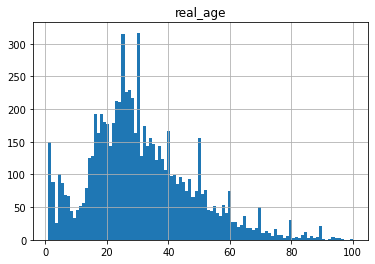

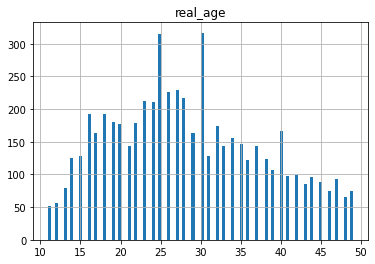

In [8]:
# график распределения возраста в выборке
labels.hist(bins=100);
labels.query('(real_age > 10) and (real_age < 50)').hist(bins=100);

💡 В данных наблюдается правосторонняя асимметрия с пиками в 25, 30, 40, 50, 60, 70 и 80 лет. Возможно, пики связаны с предобраткой данных, например с округлением возраста для отсутствующих данных.    
Большинство фотографий принадлежит людям от 15 до 40 лет, однако на гистограмме есть характерными область с группой фотографий людей от 1 до 10 лет.

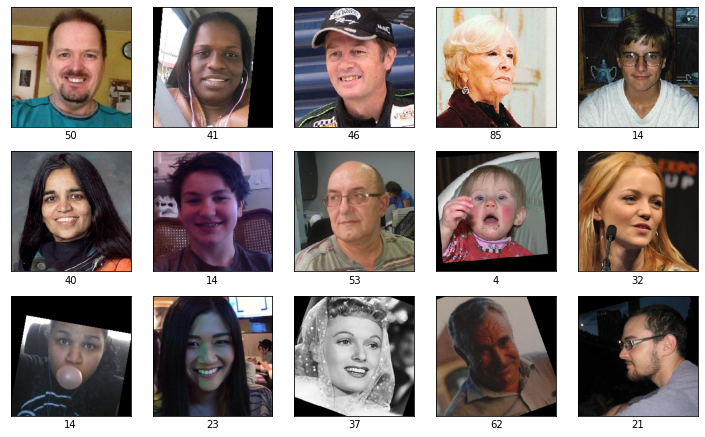

In [9]:
# вывод на экране 15 фотографий 
features, target = next(train_gen_flow)

fig = plt.figure(figsize=(10, 10))
for i in range(15):
    fig.add_subplot(5, 5, i+1)
    plt.imshow(features[i])
    plt.xlabel(target[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

💡 В датасете присутствуют фотографии с черным фоном, которые не несет полезной информации, различным положением головы, искаженным или частично перекрытым лицом. Кроме того, есть фотографии, где лицо просто трудноразличимо — слишком мальнькое, затенное или пересвеченное, или фото с визуальными деформациями и прочими абберациями.

### Выводы

💡 В исходном файле содержится набор фотографий людей с указанием возраста.

В ходе исследовательского анализа данных было выявлено:     
* В датасете содержится 7.5 тыс. фотографий — не очень большая выборка, по сравнению, например, с датасетом MNIST (60 тыс. изображений), CIFAR (50 тыс. изображений), ImageNet (14 млн. изображений). Это может негативно повлиять на качество обучения модели, однако положительно — на скорость обучения;
* Ассиметричное распределение возраста на фото — больше всего людей в возрасте от 15 до 40 лет. Это может сказаться на точности определения возраста малопредставленных в обучающем датасете групп — например пожилых людей или детей;
* В данных есть пиковые значения которые соответствуют круглым датам (25, 30, 40, 50, 60, 70 и 80 лет) — увеличивается риск переобучения модели;
* Присутствуют фотографии, на которых лицо трудно различить — это усложняет оценку возраста;
* Так как общая ориентация фотографий примерно одинакова — на некоторых фото положение лица выровнено, следовательно фотографии не нуждаются в повороте;
* Размер изображений будет приведен к единому перед обучением модели.

## Обучение модели

Обучим модель ResNet50 на GPU:

In [10]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, MaxPooling2D, Dense, Conv2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка обучающей выборки
def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25,
                                 rescale=1./255,
                                 horizontal_flip=True)
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow

# Загрузка тестовой выборки
def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25,
                                 rescale=1./255)
    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow

# Создание модели
def create_model(input_shape):
    optimizer = Adam(lr=0.0001)
    
    backbone = ResNet50(input_shape=input_shape,
                        weights='imagenet', 
                        include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['mae'])

    return model

# Запуск модели
def train_model(model, train_data, test_data, batch_size=None, epochs=10,
                steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, 
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

Train for 356 steps, validate for 119 steps    
Epoch 1/10    
356/356 - 66s - loss: 201.8798 - mae: 10.3551 - val_loss: 645.5543 - val_mae: 20.2999    
Epoch 2/10    
356/356 - 51s - loss: 84.3010 - mae: 7.0000 - val_loss: 126.0137 - val_mae: 8.5295    
Epoch 3/10    
356/356 - 60s - loss: 59.6719 - mae: 5.8953 - val_loss: 92.7586 - val_mae: 7.4813    
Epoch 4/10    
356/356 - 62s - loss: 43.9600 - mae: 5.0906 - val_loss: 72.8378 - val_mae: 6.3521    
Epoch 5/10    
356/356 - 64s - loss: 30.7126 - mae: 4.2416 - val_loss: 72.5762 - val_mae: 6.5193    
Epoch 6/10    
356/356 - 64s - loss: 25.0418 - mae: 3.7838 - val_loss: 95.0342 - val_mae: 7.6546    
Epoch 7/10    
356/356 - 62s - loss: 19.4978 - mae: 3.4053 - val_loss: 69.0445 - val_mae: 6.1144    
Epoch 8/10    
356/356 - 63s - loss: 17.1802 - mae: 3.1606 - val_loss: 64.0642 - val_mae: 5.8477    
Epoch 9/10    
356/356 - 62s - loss: 16.3632 - mae: 3.0691 - val_loss: 72.2345 - val_mae: 6.5603    
Epoch 10/10    
356/356 - 63s - loss: 13.8489 - mae: 2.8428 - val_loss: 69.1083 - val_mae: 6.2046    

119/119 - 11s - loss: 69.1083 - mae: 6.2046    
**Test MAE: 6.2046**  

### Выводы

💡 Модель сверточной нейронной сети на архитектуре ResNet и алгоритмом подбора шага градиентного спуска Adam на 
десяти эпохах показала наилучший результат MAE=6.2046 на тестовой выборке.

## Анализ обученной модели

**Средняя абсолютная ошибка в 6 лет на тестовой выборке позволяет сделать вывод, что модель на архитектуре ResNet с достаточно высокой точностью определяет приблизительный возраст человека.**  

Разработанная модель машинного обучения позволит супермаркету «Хлеб-Соль» анализировать покупки и предлагать товары, которые могут заинтересовать покупателей в выбранных возрастных группах, а также контролировать добросовестность кассиров при продаже алкоголя.